# Pneumonia Classification Using Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
train_directory = './train/'
test_directory = './test/'
valid_directory = './val/'

## Exploring data

Let's plot some random images
-----------------------------


Text(0.5, 1.0, 'person620_virus_1192.jpeg')

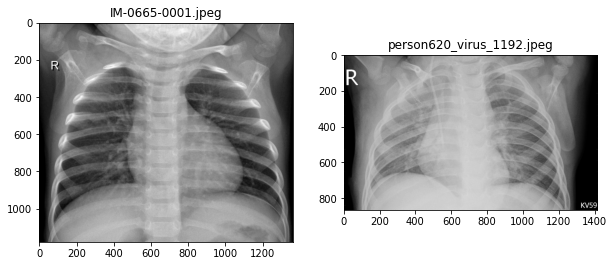

In [3]:
import os
from PIL import Image

print("Let's plot some random images")
print("-----------------------------")

images = os.listdir(train_directory+'NORMAL')
name1 = images[np.random.randint(0,len(images))]
path1 = train_directory + "NORMAL/" + name1

images = os.listdir(train_directory+'PNEUMONIA')
name2 = images[np.random.randint(0,len(images))]
path2 = train_directory + "PNEUMONIA/" + name2

plt.figure(figsize= (10,6))

plt.subplot(121)
plt.imshow(Image.open(path1), cmap='gray')
plt.title(name1)

plt.subplot(122)
plt.imshow(Image.open(path2), cmap='gray')
plt.title(name2)

## Creating ImageDataGenerators

In [4]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [5]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [6]:
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
valid_generator = valid_datagen.flow_from_directory(
    valid_directory,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


### Creating Model

In [7]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters = 64, kernel_size = 7, input_shape=[300,300,3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=1, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 256)       5

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_generator, validation_data = valid_generator, epochs= 15)

Epoch 1/15


ResourceExhaustedError:  OOM when allocating tensor with shape[128,64,300,300] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-10-c1439d5fe185>:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_1495]

Function call stack:
train_function
